## Description

**The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.**



# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.



### Notebook - Table of Content

1. **Importing necessary libraries**
2. **Loading data**
3. **Data preprocessing**
    - 3.a Checking for duplicates
    - 3.b Checking for missing values
    - 3.c Checking for class imbalance
4. **Exploratory Data Analysis**
    - 4.a Analysing tBodyAccMag-mean feature
    - 4.b Analysing Angle between X-axis and gravityMean feature
    - 4.c Analysing Angle between Y-axis and gravityMean feature
    - 4.d Visualizing data using t-SNE
5. **Model Prediction and Evaluation**
    - 5.a Logistic regression model with Hyperparameter tuning and cross validation
    - 5.b Linear SVM model with Hyperparameter tuning and cross validation
    - 5.c Kernel SVM model with Hyperparameter tuning and cross validation
    - 5.d Decision tree model with Hyperparameter tuning and cross validation
    - 5.e Random forest model with Hyperparameter tuning and cross validation

## 1. Importing Liberaries

In [410]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings

## 2. Loading Data

In [62]:
train=pd.read_csv('C:/Users/HP/OneDrive/Desktop/GitHub/Project/Human Activity Recognition using smartphone/dataset/train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [64]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [65]:
test=pd.read_csv('C:/Users/HP/OneDrive/Desktop/GitHub/Project/Human Activity Recognition using smartphone/dataset/test.csv')
test.shape

(999, 563)

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 4.3+ MB


##  3. Data Preprocessing

### 3.a Checking for duplicates

In [67]:
# Checking Duplicate records
print('No. Duplicates record in train : ',train.duplicated().sum())
print('No. Duplicates record in test : ',test.duplicated().sum())

No. Duplicates record in train :  0
No. Duplicates record in test :  0


### 3.b Checking for missing values

In [68]:
# checking missing values
print('The No. of missing values in train : ',train.isnull().values.sum())
print('The No. of missing values in test : ',test.isnull().values.sum())

The No. of missing values in train :  0
The No. of missing values in test :  0


In [69]:
train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [70]:
train.Activity.nunique()

6

In [71]:
train.Activity.value_counts().index

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

### 3.c Checking for class imbalance

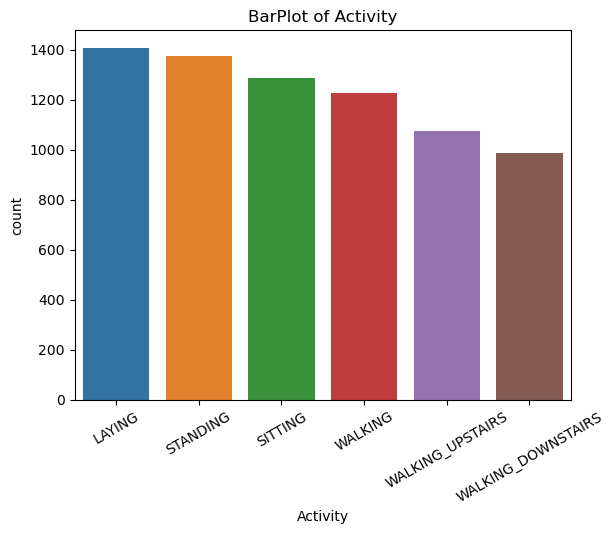

In [72]:
#checkiing the class imbalance
plt.figure()
sns.countplot(data=train,x=train.Activity,order=train.Activity.value_counts().index)
plt.title('BarPlot of Activity')
plt.xticks(rotation=30)
plt.show()

There are almost same no. of observation in each activities so this data does not have any data imbalance.  

## 4.  Exploratory Data Analysis

In [73]:
len(train.columns)

563

In [74]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


#### what feature are there ?

In [75]:
'tBodyAcc-mean()-X'.split('-')

['tBodyAcc', 'mean()', 'X']

In [76]:
'tBodyAcc-mean()-X'.split('-')[0]

'tBodyAcc'

In [77]:
sample_string='angle(tBodyAccMean,gravity)'
sample_string.split('-')[0].split('(')[0]

'angle'

In [78]:
columns=[col.split('-')[0].split('(')[0] for col in train.columns]

In [79]:
columns

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [80]:
len(columns)

563

In [82]:
columns=list(set(columns))
print(len(columns))
columns
# but here we lost the no. of sub columns right 

20


['fBodyBodyAccJerkMag',
 'Activity',
 'tBodyAccMag',
 'tBodyGyroJerk',
 'tBodyGyroMag',
 'fBodyAccMag',
 'tBodyGyro',
 'angle',
 'tBodyAccJerkMag',
 'fBodyGyro',
 'tBodyAccJerk',
 'fBodyAccJerk',
 'tBodyGyroJerkMag',
 'fBodyAcc',
 'fBodyBodyGyroMag',
 'subject',
 'tBodyAcc',
 'fBodyBodyGyroJerkMag',
 'tGravityAcc',
 'tGravityAccMag']

In [87]:
dict=Counter([col.split('-')[0].split('(')[0] for col in train.columns])
dict

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [89]:
dict.keys()

dict_keys(['tBodyAcc', 'tGravityAcc', 'tBodyAccJerk', 'tBodyGyro', 'tBodyGyroJerk', 'tBodyAccMag', 'tGravityAccMag', 'tBodyAccJerkMag', 'tBodyGyroMag', 'tBodyGyroJerkMag', 'fBodyAcc', 'fBodyAccJerk', 'fBodyGyro', 'fBodyAccMag', 'fBodyBodyAccJerkMag', 'fBodyBodyGyroMag', 'fBodyBodyGyroJerkMag', 'angle', 'subject', 'Activity'])

In [106]:
df=pd.DataFrame.from_dict(dict,orient='index')
df.rename(columns={0:'count'},inplace=True)
df.sort_values(by='count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


#### 4.a Analyzing tBodyAccMag-mean feature

<Figure size 800x500 with 0 Axes>

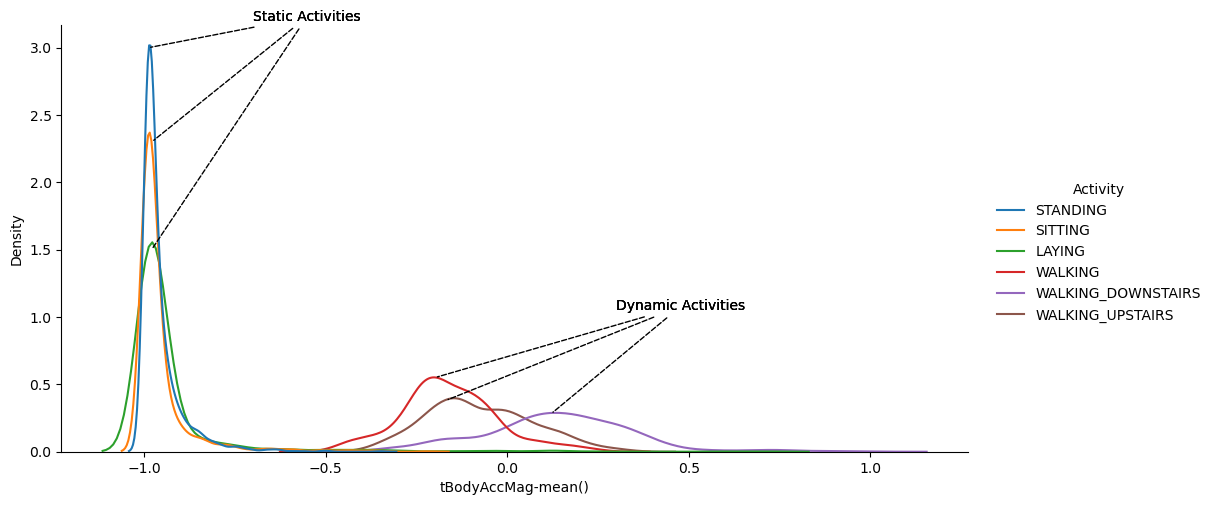

In [200]:
plt.figure(figsize=(8,5))
fig=sns.displot(data=train,x=train['tBodyAccMag-mean()'],kind='kde',hue=train['Activity'],aspect= 2)
# text : Static Activities
plt.annotate("Static Activities",xy=(-0.98,1.5),xytext=(-0.7,3.2),arrowprops={'arrowstyle':'-','ls':'--'})
plt.annotate("Static Activities",xy=(-0.98,2.3),xytext=(-0.7,3.2),arrowprops={'arrowstyle':'-','ls':'--'})
plt.annotate("Static Activities",xy=(-0.99,3),xytext=(-0.7,3.2),arrowprops={'arrowstyle':'-','ls':'--'})

# text : Dynamic Activities
plt.annotate("Dynamic Activities",xy=(-0.2,0.55),xytext=(0.3,1.05),arrowprops={'arrowstyle':'-','ls':'--'})
plt.annotate("Dynamic Activities",xy=(-0.17,0.38),xytext=(0.3,1.05),arrowprops={'arrowstyle':'-','ls':'--'})
plt.annotate("Dynamic Activities",xy=(0.12,0.28),xytext=(0.3,1.05),arrowprops={'arrowstyle':'-','ls':'--'})

plt.show()

Text(0.5, 1.0, 'Dynamic Activites(Closer view)')

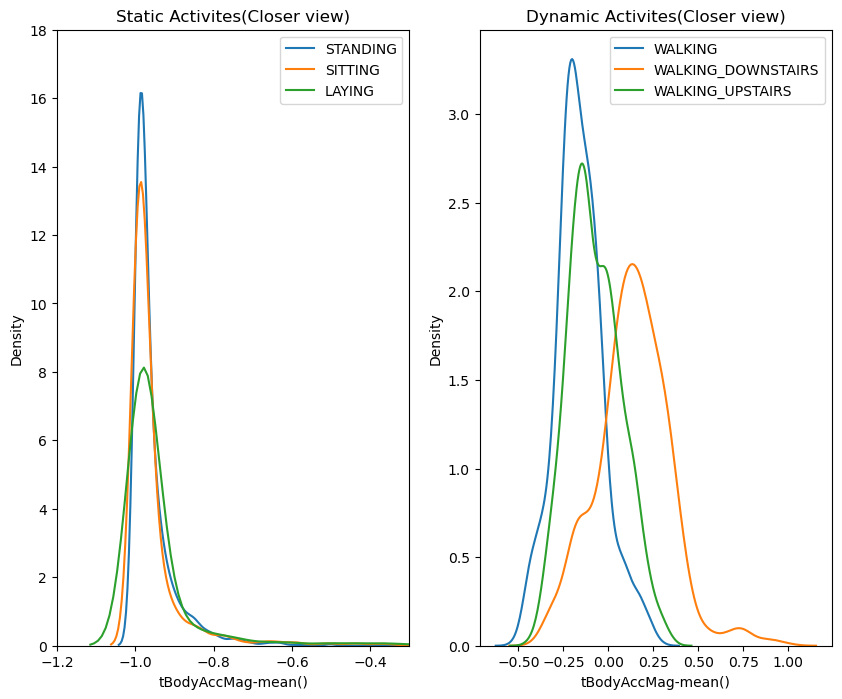

In [262]:
filterwarnings('ignore')
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'],label='STANDING',hist=False)
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'],label='SITTING',hist=False)
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'],label='LAYING',hist=False)
plt.axis([-1.2,-0.3,0,18])
plt.legend()
plt.title("Static Activites(Closer view)")


plt.subplot(1,2,2)
sns.distplot(train[train['Activity']=='WALKING']['tBodyAccMag-mean()'],label='WALKING',hist=False)
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],label='WALKING_DOWNSTAIRS',hist=False)
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],label='WALKING_UPSTAIRS',hist=False)
plt.legend()
plt.title("Dynamic Activites(Closer view)")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

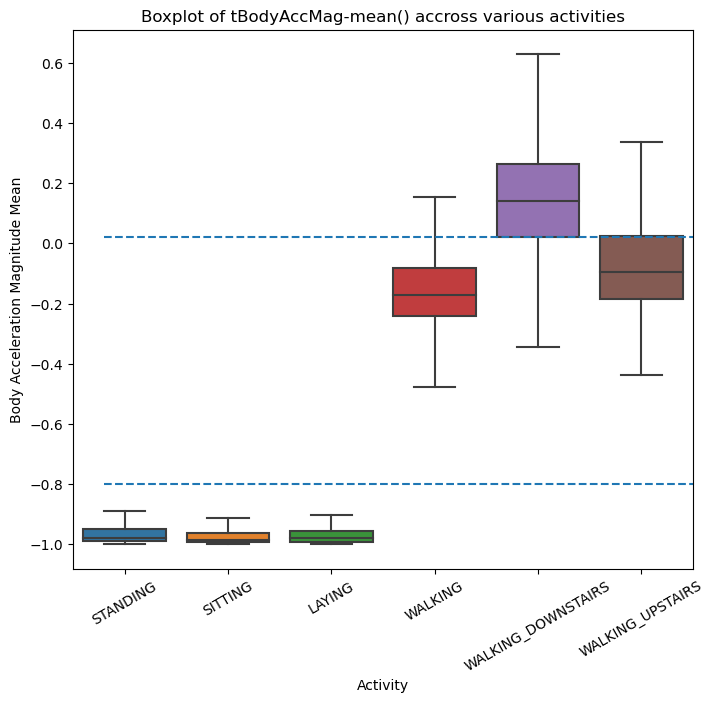

In [360]:
plt.figure(figsize=(8,7))
sns.boxplot(data=train,x='Activity',y='tBodyAccMag-mean()',showfliers=False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.title("Boxplot of tBodyAccMag-mean() accross various activities")
plt.axhline(y=-0.8,xmin=0.05,xmax=2,linestyle='--')
plt.axhline(y=0.02,xmin=0.05,xmax=2,linestyle='--')
plt.xticks(rotation=30)

### 4.b Analysing Angle btw  X-axis and gravityMean Feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

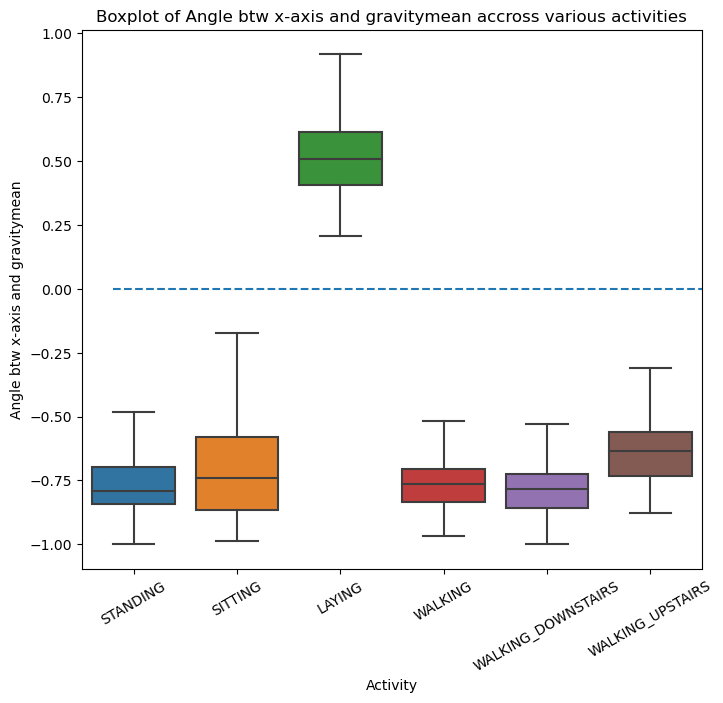

In [364]:
plt.figure(figsize=(8,7))
sns.boxplot(data=train,x='Activity',y='angle(X,gravityMean)',showfliers=False)
plt.ylabel('Angle btw x-axis and gravitymean')
plt.title("Boxplot of Angle btw x-axis and gravitymean accross various activities")
plt.axhline(y=0,xmin=0.05,xmax=2,linestyle='--')

plt.xticks(rotation=30)

using angle between x-axis and gravitymean we can easy classify the laying activity , 
but it also leads to some missclassification

### 4.c Analysing Angle btw  Y-axis and gravityMean Feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

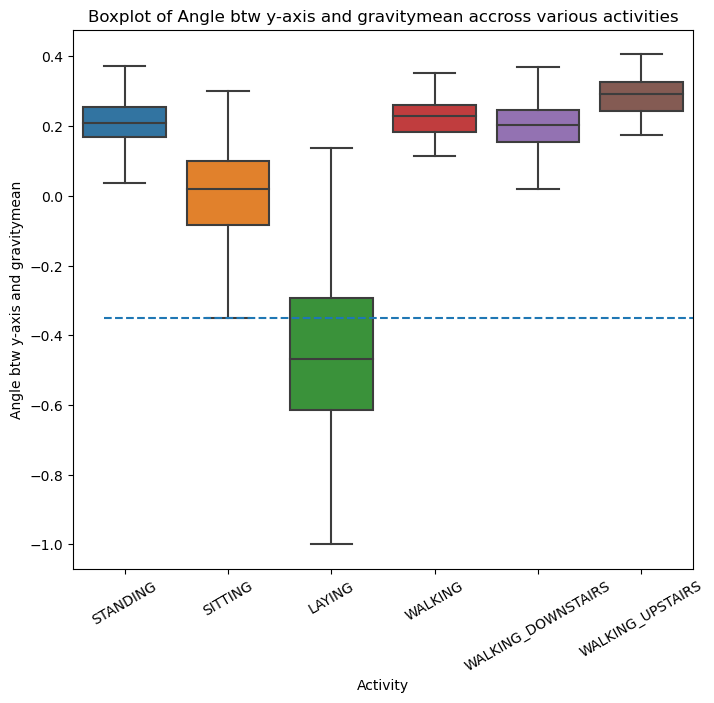

In [373]:
plt.figure(figsize=(8,7))
sns.boxplot(data=train,x='Activity',y='angle(Y,gravityMean)',showfliers=False)
plt.ylabel('Angle btw y-axis and gravitymean')
plt.title("Boxplot of Angle btw y-axis and gravitymean accross various activities")
plt.axhline(y=-0.35,xmin=0.05,xmax=2,linestyle='--')

plt.xticks(rotation=30)

Similary,using angle between x-axis and gravitymean we can easy classify the laying activity , 
but it also leads to some missclassification

### 4d . Visualizing data using PCA

Using PCA data can be visualized from a extremely high dimensional space and still it retains lots of actual information.Given training data has (561) unique features using PCA we can visualize it to a 2D space. 

In [379]:
x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

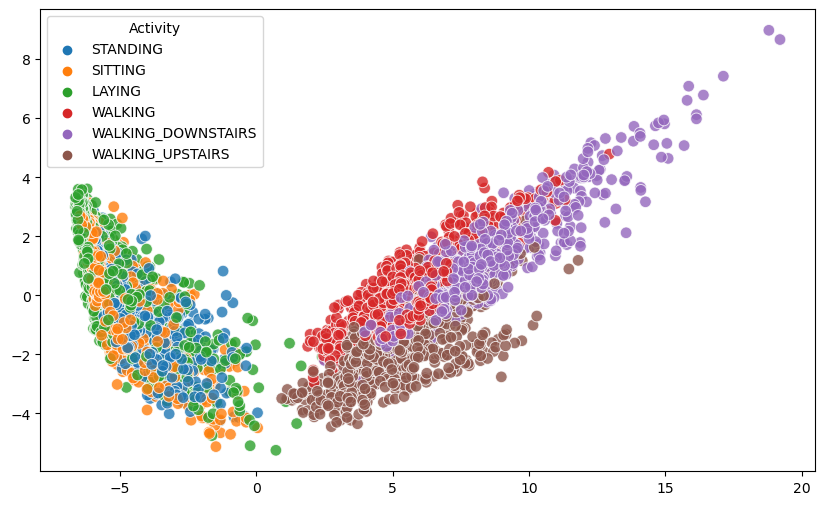

In [390]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train.Activity,s=70,alpha=0.8)

### 4d . Visualizing data using t-SNE

Using t-SNE data can be visualized from high dimensional space and still it remains lots of actual information. Given training data has (561) features ,using t-SNE we can visualize it to a 2D space.

it is more efficient than PCA.

In [391]:
x_for_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)

In [392]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<Axes: >

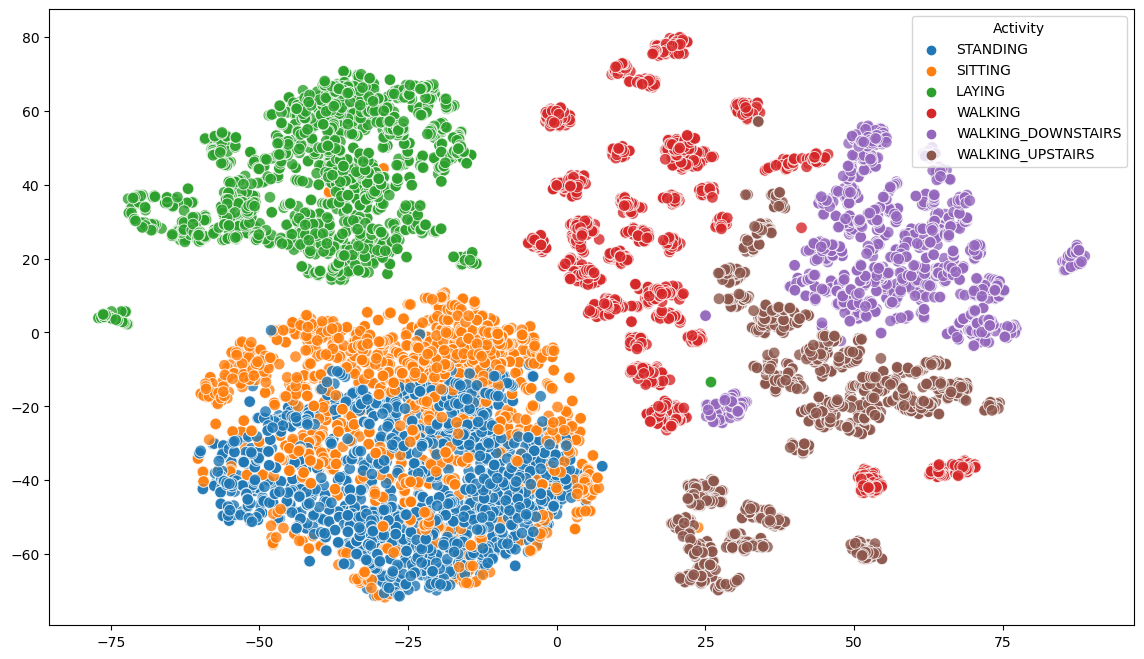

In [394]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train.Activity,s=70,alpha=0.8)

## 5. ML models

Getting training and test data ready


In [395]:
x_train=train.drop(['subject','Activity'],axis=1)
y_train=train['Activity']

x_test=test.drop(['subject','Activity'],axis=1)
y_test=test['Activity']

In [396]:
print('Size of training data : ', x_train.shape)
print('Size of testing data : ', x_test.shape)

Size of training data :  (7352, 561)
Size of testing data :  (999, 561)


### 5.a Logistic regression model with hyperparameter tuning and cross validation

In [422]:
parameter={'max_iter':[100,200,300]}
lr_classifier=LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameter,cv=5,random_state=42)
lr_classifier_rs.fit(x_train,y_train)
y_pred_lr=lr_classifier_rs.predict(x_test)

In [423]:
lr_accuracy=accuracy_score(y_test,y_pred_lr)
print('Accuracy Score of Logistic Regression : ',lr_accuracy)

Accuracy Score of Logistic Regression :  0.954954954954955


In [449]:
cm=confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [475]:
np.unique(y_pred_lr)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [477]:
def get_best_randomseacrch_results(model):
    print("Best estimator : ",model.best_estimator_)
    print("Best set of parameters : ",model.best_params_)
    #print('Best score : ',model.best_score_)

In [451]:
# getting best random search attributes 
get_best_randomseacrch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=300)
Best set of parameters :  {'max_iter': 300}


Text(0.5, 1.0, 'Heatmap of confusion matrix')

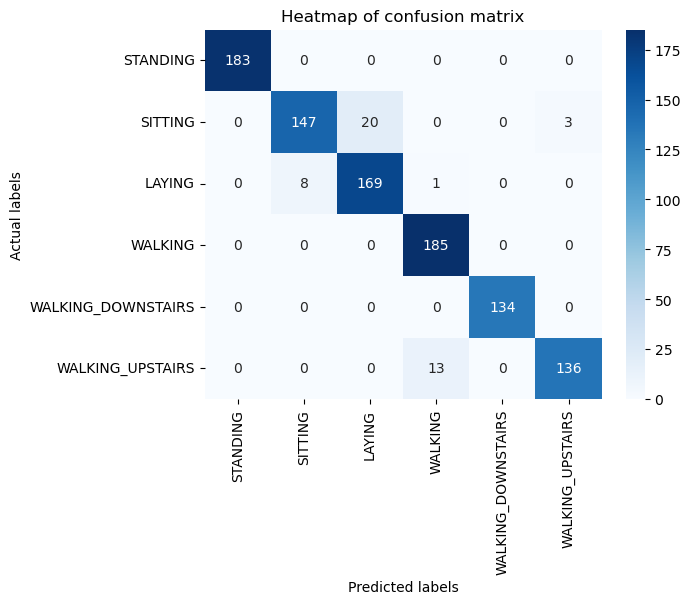

In [469]:
sns.heatmap(cm,cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Heatmap of confusion matrix')

### 5.c Kernel SVM model with hyperparameter tuning and cross validation

In [480]:
parameter={
    'kernel' : ['linear','rbf','poly','sigmoid'],
    'C' : [100,50]
}

svm_rs= RandomizedSearchCV(estimator=SVC() , param_distributions=parameter,n_iter=50,random_state=42,cv=3)
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50,
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [482]:
y_pred_rs=svm_rs.predict(x_test)
acc_svm_rs=accuracy_score(y_test,y_pred_rs)
print('Accuracy Score of SVM : ',acc_svm_rs)

Accuracy Score of SVM :  0.965965965965966


In [483]:
get_best_randomseacrch_results(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


In [487]:
cm_svm=confusion_matrix(y_test,y_pred_rs)
cm_svm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   7, 171,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

Text(0.5, 1.0, 'Heatmap of confusion matrix of SVM')

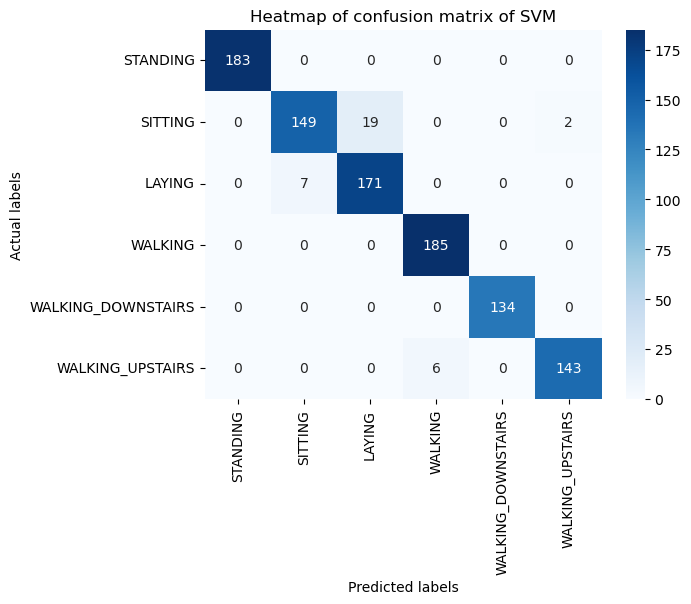

In [488]:
sns.heatmap(cm_svm,cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Heatmap of confusion matrix of SVM')

### 5.c Decision tree model using hyperparameter tuning and cross validation

In [497]:
parameters={
    'max_depth' : np.arange(2,10,2)
           }

dt_rs=RandomizedSearchCV(estimator=DecisionTreeClassifier(),random_state=42,param_distributions=parameters)
dt_rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [498]:
y_pred_dt=dt_rs.predict(x_test)
acc_dt_rs=accuracy_score(y_test,y_pred_dt)
print('Accuracy score of Decision tree is : ',acc_dt_rs)

Accuracy score of Decision tree is :  0.8538538538538538


In [499]:
get_best_randomseacrch_results(dt_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


In [500]:
cm_dt=confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[183,   0,   0,   0,   0,   0],
       [  0, 107,  63,   0,   0,   0],
       [  0,  29, 149,   0,   0,   0],
       [  0,   0,   0, 182,   3,   0],
       [  0,   0,   0,   6, 125,   3],
       [  0,   0,   0,  36,   6, 107]], dtype=int64)

Text(0.5, 1.0, 'Heatmap of confusion matrix of Decision Tree')

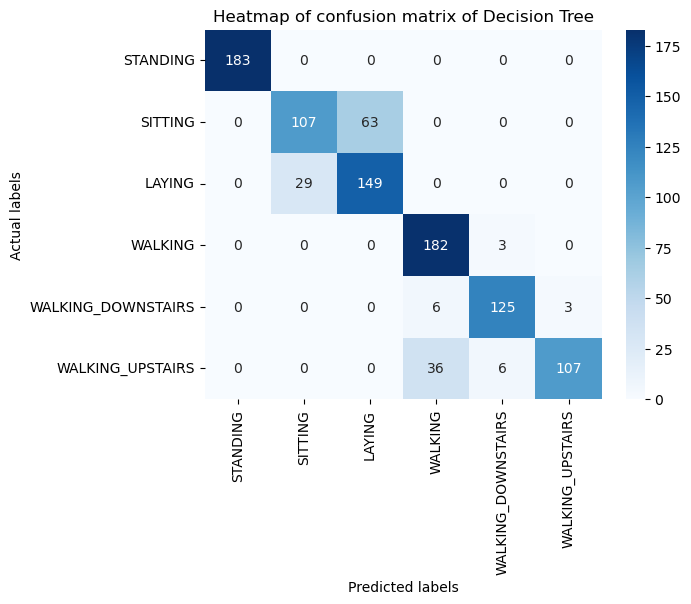

In [501]:
sns.heatmap(cm_dt,cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Heatmap of confusion matrix of Decision Tree')

### 5.RandomForest Classifier model using hyperparameter tuning and cross validation

In [505]:
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth' : np.arange(2,17,2)
       }

rf_rs=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,random_state=42)
rf_rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [508]:
y_pred_rf=dt_rs.predict(x_test)
acc_rf_rs=accuracy_score(y_test,y_pred_rf)
print('Accuracy score of Decision tree is : ',acc_rf_rs)

Accuracy score of Decision tree is :  0.8538538538538538


In [509]:
get_best_randomseacrch_results(rf_rs)

Best estimator :  RandomForestClassifier(max_depth=8, n_estimators=30)
Best set of parameters :  {'n_estimators': 30, 'max_depth': 8}


In [510]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[183,   0,   0,   0,   0,   0],
       [  0, 107,  63,   0,   0,   0],
       [  0,  29, 149,   0,   0,   0],
       [  0,   0,   0, 182,   3,   0],
       [  0,   0,   0,   6, 125,   3],
       [  0,   0,   0,  36,   6, 107]], dtype=int64)

Text(0.5, 1.0, 'Heatmap of confusion matrix of Random Forest Classifier')

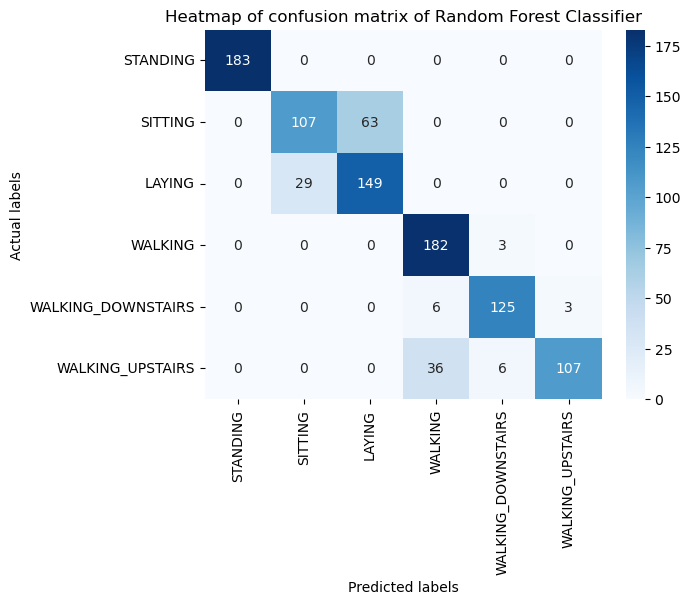

In [511]:
sns.heatmap(cm_rf,cmap=plt.cm.Blues,xticklabels=labels,yticklabels=labels,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Heatmap of confusion matrix of Random Forest Classifier')